# Gender roles and pronouns in Austen's texts

Following examples from post at [GENDER ROLES WITH TEXT MINING AND N-GRAMS](https://juliasilge.com/blog/gender-pronouns/).

Books from [Project Gutenberg](http://onlinebooks.library.upenn.edu/webbin/gutbook/author?name=Austen%2C%20Jane%2C%201775-1817)

In [1]:
import re
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Read the books and get the bigrams

First, define the books and the files they're in.

In [2]:
austen_books_filenames = {
    'Persuasion': '105.txt',
    'Northanger Abbey': '121.txt',
    'Pride and Prejudice': '1342.txt',
    'Mansfield Park': '141.txt',
    'Emma': '158-0.txt',
    'Sense and Sensibility': '161.txt'
}

eliot_books_filenames = {
    'Middlemarch': 'pg145.txt',
    'Silas Marner': 'pg550.txt',
    'The Mill on the Floss': '6688-0.txt'
}

bronte_books_filenames = {'Jane Eyre': 'pg1260.txt'}

Split a book into words, dropping punctuation and excessive whitespace.

In [4]:
token_split_re = re.compile(r'\W')

def tokens(text):
    return [token.strip('_') # underscore is used to signify italic, but we don't want that in this analysis
            for token in re.split(token_split_re, text) 
            if token]

In [5]:
austen_books = {title: open(austen_books_filenames[title], encoding='latin1').read().lower()
                for title in austen_books_filenames}

In [6]:
tokens(austen_books['Emma'])[:30]

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of']

In [7]:
austen_books_all_tokens = [token for book in austen_books for token in tokens(austen_books[book])]
len(austen_books_all_tokens)

733839

Now find all the bigrams (ordered pairs of words).

In [8]:
def bigrams(tokens):
    return [(tokens[i-1], tokens[i]) for i in range(1, len(tokens))]

In [9]:
bigrams(tokens(austen_books['Emma']))

[('emma', 'by'),
 ('by', 'jane'),
 ('jane', 'austen'),
 ('austen', 'volume'),
 ('volume', 'i'),
 ('i', 'chapter'),
 ('chapter', 'i'),
 ('i', 'emma'),
 ('emma', 'woodhouse'),
 ('woodhouse', 'handsome'),
 ('handsome', 'clever'),
 ('clever', 'and'),
 ('and', 'rich'),
 ('rich', 'with'),
 ('with', 'a'),
 ('a', 'comfortable'),
 ('comfortable', 'home'),
 ('home', 'and'),
 ('and', 'happy'),
 ('happy', 'disposition'),
 ('disposition', 'seemed'),
 ('seemed', 'to'),
 ('to', 'unite'),
 ('unite', 'some'),
 ('some', 'of'),
 ('of', 'the'),
 ('the', 'best'),
 ('best', 'blessings'),
 ('blessings', 'of'),
 ('of', 'existence'),
 ('existence', 'and'),
 ('and', 'had'),
 ('had', 'lived'),
 ('lived', 'nearly'),
 ('nearly', 'twenty'),
 ('twenty', 'one'),
 ('one', 'years'),
 ('years', 'in'),
 ('in', 'the'),
 ('the', 'world'),
 ('world', 'with'),
 ('with', 'very'),
 ('very', 'little'),
 ('little', 'to'),
 ('to', 'distress'),
 ('distress', 'or'),
 ('or', 'vex'),
 ('vex', 'her'),
 ('her', 'she'),
 ('she', 'was'),

Gendered bigrams are those with 'he' or 'she' in the first position.

In [10]:
gendered_bigrams = {book: 
                    collections.Counter(bigram 
                                        for bigram in bigrams(tokens(austen_books[book]))
                                        if bigram[0] == 'he' or bigram[0] == 'she') 
                   for book in austen_books}

In [11]:
gendered_bigrams['Emma']

Counter({('he', 'a'): 1,
         ('he', 'acknowledged'): 1,
         ('he', 'added'): 4,
         ('he', 'admired'): 1,
         ('he', 'advances'): 1,
         ('he', 'affronted'): 1,
         ('he', 'after'): 1,
         ('he', 'agreeable'): 1,
         ('he', 'agreed'): 1,
         ('he', 'almost'): 1,
         ('he', 'always'): 4,
         ('he', 'and'): 8,
         ('he', 'answered'): 4,
         ('he', 'anticipated'): 1,
         ('he', 'appear'): 1,
         ('he', 'appeared'): 4,
         ('he', 'appears'): 1,
         ('he', 'argued'): 1,
         ('he', 'as'): 1,
         ('he', 'asked'): 6,
         ('he', 'asks'): 1,
         ('he', 'at'): 2,
         ('he', 'attended'): 1,
         ('he', 'avoid'): 1,
         ('he', 'be'): 3,
         ('he', 'bear'): 1,
         ('he', 'became'): 3,
         ('he', 'been'): 4,
         ('he', 'began'): 13,
         ('he', 'begged'): 1,
         ('he', 'begun'): 1,
         ('he', 'believed'): 4,
         ('he', 'believes'): 1,
         (

In [12]:
gendered_bigrams['Emma'].most_common(10)

[(('she', 'had'), 334),
 (('she', 'was'), 331),
 (('he', 'had'), 242),
 (('he', 'was'), 222),
 (('she', 'could'), 172),
 (('she', 'is'), 124),
 (('he', 'is'), 99),
 (('she', 'would'), 96),
 (('he', 'could'), 96),
 (('he', 'would'), 85)]

In [13]:
def gendered_bigrams(tokens):
    return collections.Counter(bigram
                               for bigram in bigrams(tokens)
                               if bigram[0] == 'he' or bigram[0] == 'she')

In [14]:
gendered_bigrams_austen = gendered_bigrams(austen_books_all_tokens)

gendered_bigrams_austen.most_common(10)

[(('she', 'had'), 1478),
 (('she', 'was'), 1391),
 (('he', 'had'), 1030),
 (('he', 'was'), 895),
 (('she', 'could'), 825),
 (('he', 'is'), 401),
 (('she', 'would'), 387),
 (('she', 'is'), 334),
 (('he', 'could'), 311),
 (('he', 'would'), 268)]

Count the number of occurrences of each gendered bigram, separated by gender.

In [15]:
def gender_counts(bigrams, lower_limit=0):
    gcounts = pd.DataFrame(
        {gender: {bigram[1]: bigrams[bigram] 
              for bigram in bigrams 
              if bigram[0] == gender}
         for gender in ['she', 'he']})
    gcounts.fillna(value=0, inplace=True)
    return gcounts[gcounts.sum(axis=1) > lower_limit]

In [16]:
gender_counts_austen = gender_counts(gendered_bigrams_austen) 
gender_counts_austen

,he,she
a,5.0,7.0
able,0.0,1.0
abominates,1.0,0.0
absented,0.0,1.0
absolutely,3.0,1.0
abstained,0.0,1.0
acceded,0.0,1.0
accepted,0.0,3.0
accidentally,0.0,2.0
accordingly,1.0,1.0


In [17]:
useful_gender_counts_austen = gender_counts(gendered_bigrams_austen, lower_limit=10) 
useful_gender_counts_austen

,he,she
a,5.0,7.0
acknowledged,6.0,9.0
added,31.0,51.0
always,11.0,16.0
and,40.0,39.0
answered,11.0,18.0
appeared,10.0,8.0
as,15.0,12.0
asked,18.0,12.0
assured,5.0,6.0


In [18]:
useful_gender_counts_austen.size

326

Now find the odds ratio, which is the ratio of probabilities of each word being preceeded by 'she' vs the probabilty of it being preceeded by 'he'. 

To keep the numbers in a sensible range, take the log of the ratio.

Because not every work appears for both genders, we apply some 'smoothing' to avoid things blowing up. The smoothing in the original blog post was to add one to the number of occurrences of each genered bigram, and add one to the total number of bigrams for that gender. A slightly less bad version is to assume we've seen each possible bigram some small number of times (e.g. 0.1) and adust all the scores accordingly.

In [19]:
def find_ratios(gcounts, smoothing_add=0.1, smoothing_scale=None):
    if smoothing_scale is None:
        smoothing_scale = smoothing_add * gcounts.size

    gender_ratio = pd.DataFrame(
        {'she': (gcounts['she'] + smoothing_add) / (gcounts['she'].sum() + smoothing_scale),
         'he': (gcounts['he'] + smoothing_add) / (gcounts['he'].sum() + smoothing_scale)}
        )
    gender_ratio['logratio'] = (gender_ratio.she / gender_ratio.he).apply(np.log2)
    gender_ratio['abslogratio'] = gender_ratio.logratio.abs()
    return gender_ratio

In [20]:
gender_ratio_austen = find_ratios(useful_gender_counts_austen, smoothing_add=1, smoothing_scale=1)
gender_ratio_austen.sort_values('abslogratio').head(10)

,he,she,logratio,abslogratio
i,0.003128,0.003153,0.011423,0.011423
have,0.003128,0.003153,0.011423,0.011423
always,0.001877,0.001914,0.028497,0.028497
acknowledged,0.001095,0.001126,0.040570,0.040570
it,0.001095,0.001126,0.040570,0.040570
remained,0.001095,0.001126,0.040570,0.040570
had,0.161245,0.166535,0.046574,0.046574
would,0.042071,0.043689,0.054447,0.054447
paused,0.001408,0.001464,0.056511,0.056511
loves,0.000938,0.000901,-0.058966,0.058966


In [21]:
gender_ratio_austen = find_ratios(useful_gender_counts_austen)
gender_ratio_austen.sort_values('abslogratio').head(10)

,he,she,logratio,abslogratio
a,0.000794,0.000797,0.005307,0.005307
loves,0.000794,0.000797,0.005307,0.005307
too,0.000794,0.000797,0.005307,0.005307
have,0.002972,0.003041,0.032705,0.032705
i,0.002972,0.003041,0.032705,0.032705
had,0.160312,0.165844,0.048944,0.048944
would,0.041724,0.043433,0.057920,0.057920
always,0.001727,0.001806,0.064486,0.064486
must,0.022115,0.020881,-0.082844,0.082844
wrote,0.002039,0.001919,-0.087586,0.087586


These are the words with the greatest gender skew.

In [22]:
gender_ratio_austen.sort_values('abslogratio', ascending=False).head(10)

,he,she,logratio,abslogratio
remembered,0.000016,0.001806,6.858902,6.858902
read,0.000327,0.002592,2.987416,2.987416
resolved,0.000327,0.001582,2.275219,2.275219
longed,0.000327,0.001470,2.169090,2.169090
stopped,0.002039,0.000460,-2.147886,2.147886
takes,0.001416,0.000348,-2.025614,2.025614
felt,0.005774,0.021329,1.885252,1.885252
heard,0.001572,0.005509,1.809353,1.809353
replied,0.009664,0.002816,-1.778921,1.778921
married,0.001572,0.000460,-1.772675,1.772675


Extract the words with the greatest skew, put them in a new DataFrame, and give each one a number so we can get back to it in the plotting.

The window says how many from each end of the list of gendered words, such as the 15 most female and the 15 most make.

If we want to exclude words from plotting, pass in a list of stopwords.

In [23]:
def extract_plot_items(gratios_in, window=15, stopwords=None):
    if stopwords:
        gratios = gratios_in.drop(stopwords)
    else:
        gratios = gratios_in
    plot_items = gratios.sort_values('logratio', ascending=False).head(window).append(
        gratios.sort_values('logratio').head(window)).sort_values('logratio', ascending=False)
    plot_items['index_pos'] = list(reversed(range(len(plot_items))))
    return plot_items

In [24]:
plot_items_austen = extract_plot_items(gender_ratio_austen)
len(plot_items_austen)

30

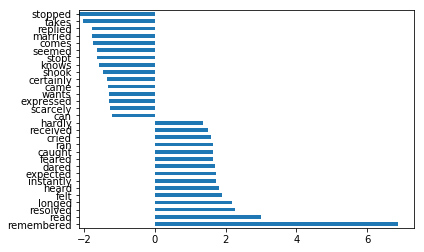

In [25]:
plot_items_austen.logratio.plot.barh()

Plot the results, doing lots of matplotlib fiddling to make it look pretty.

In [26]:
def gender_plot(plot_items, author):
    plt.figure(figsize=(10,10))

    plot_items['colour'] = plot_items.logratio.apply(lambda l: 'r' if l > 0 else 'b')

    plt.plot(plot_items[plot_items.logratio > 0].logratio, 
             plot_items[plot_items.logratio > 0].index_pos, 
             marker='o', linestyle='', markersize=15.0, color='r')

    plt.plot(plot_items[plot_items.logratio < 0].logratio, 
             plot_items[plot_items.logratio < 0].index_pos, 
             marker='o', linestyle='', markersize=15.0, color='b')

    for _, r in plot_items.iterrows():
        plt.plot([0, r.logratio], [r.index_pos, r.index_pos], color=r.colour, linestyle='-', linewidth=3)


    words = plot_items.sort_values('index_pos').index
    plt.yticks(np.arange(len(plot_items)), words)
    
    xts = list(range(int(min(plot_items.logratio)) - 1, int(max(plot_items.logratio)) + 2))
    plt.xticks(xts, ['×{}'.format(2**i) for i in xts])
#     plt.xticks([-2, -1, 0, 1, 2, 3, 4, 5, 6], ['×¼', '×½', 'same', '×2', '×4', '×8', '×16', '×32', '×64'])

    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.tick_params(axis='x', which='major', labelsize=12)

    plt.xlabel("Relative appearance after 'she' compared to 'he'", fontsize=16)

    plt.suptitle("Words paired with 'he' and 'she' in {}'s novels".format(author), fontsize=20)
    plt.title(("Women {}, {}, and {} ".format(words[-1], words[-2], words[-3]) + 
              "while men {}, {}, and {}".format(words[0], words[1], words[2])) , fontsize=16)

    plt.grid()

    for spine in plt.gca().spines.values():
        spine.set_visible(False)    

    plt.show()

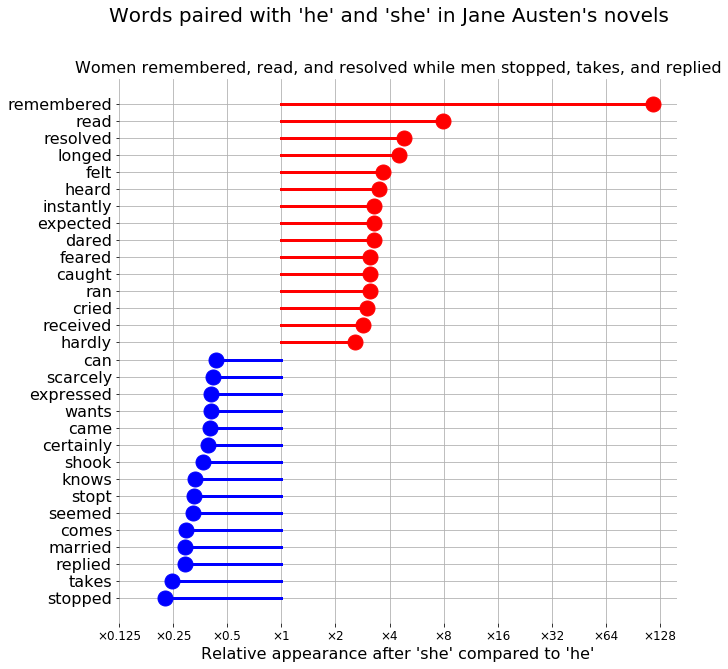

In [27]:
gender_plot(plot_items_austen, 'Jane Austen')

# George Eliot
Do the same with George Eliot's books, reusing the functions defined above.

In [28]:
eliot_books = {title: open(eliot_books_filenames[title], encoding='latin1').read().lower()
                for title in eliot_books_filenames}

In [29]:
eliot_books_all_tokens = [token for book in eliot_books for token in tokens(eliot_books[book])]
len(eliot_books_all_tokens)

612202

In [30]:
gendered_bigrams_eliot = gendered_bigrams(eliot_books_all_tokens)
gendered_bigrams_eliot.most_common(10)

[(('he', 'had'), 1424),
 (('he', 'was'), 1038),
 (('she', 'had'), 761),
 (('she', 'was'), 705),
 (('he', 'would'), 367),
 (('he', 'said'), 357),
 (('he', 'could'), 283),
 (('she', 'said'), 239),
 (('he', 'is'), 226),
 (('she', 'would'), 209)]

In [31]:
useful_gender_counts_eliot = gender_counts(gendered_bigrams_eliot, lower_limit=10) 
useful_gender_counts_eliot.head()

,he,she
added,65.0,44.0
always,31.0,12.0
and,20.0,17.0
answered,22.0,15.0
asked,12.0,8.0


In [32]:
gender_ratio_eliot = find_ratios(useful_gender_counts_eliot, smoothing_add=1, smoothing_scale=1)
gender_ratio_eliot.sort_values('abslogratio', ascending=False).head(10)

,he,she,logratio,abslogratio
herself,0.000136,0.005437,5.326106,5.326106
himself,0.003931,0.000227,-4.116838,4.116838
read,0.000542,0.002719,2.326106,2.326106
ran,0.000542,0.002266,2.063071,2.063071
left,0.002982,0.000906,-1.718288,1.718288
means,0.001491,0.000453,-1.718288,1.718288
shall,0.001491,0.000453,-1.718288,1.718288
needed,0.000949,0.002719,1.518751,1.518751
told,0.003117,0.001133,-1.460491,1.460491
married,0.000678,0.001812,1.419215,1.419215


In [33]:
gender_ratio_eliot = find_ratios(useful_gender_counts_eliot)
gender_ratio_eliot.sort_values('abslogratio', ascending=False).head(10)

,he,she,logratio,abslogratio
herself,0.000014,0.005202,8.589442,8.589442
himself,0.003795,0.000023,-7.396733,7.396733
read,0.000419,0.002500,2.577913,2.577913
shall,0.001364,0.000248,-2.461087,2.461087
means,0.001364,0.000248,-2.461087,2.461087
ran,0.000419,0.002049,2.291292,2.291292
left,0.002850,0.000698,-2.029210,2.029210
told,0.002985,0.000923,-1.692657,1.692657
dreaded,0.001499,0.000473,-1.664405,1.664405
needed,0.000824,0.002500,1.601372,1.601372


In [34]:
plot_items_eliot = extract_plot_items(gender_ratio_eliot, window=15, stopwords=['herself', 'himself'])
len(plot_items_eliot)

30

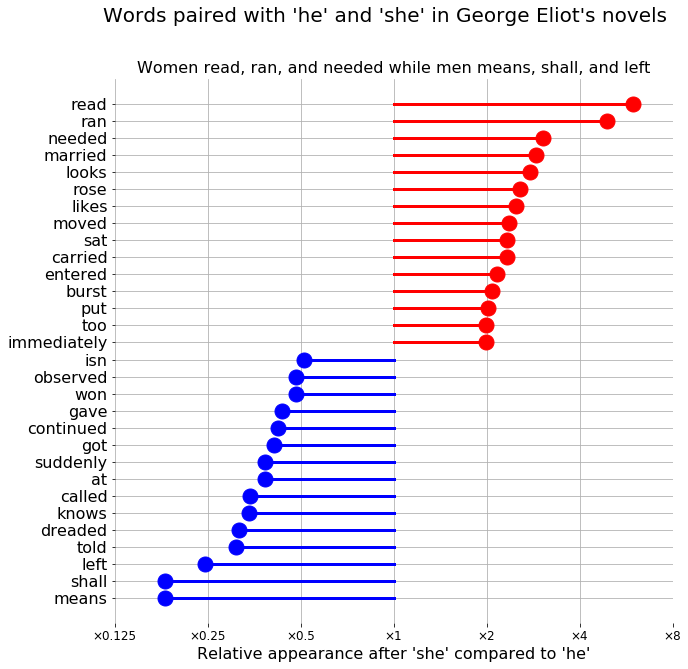

In [35]:
gender_plot(plot_items_eliot, 'George Eliot')

# Jane Eyre

In [36]:
bronte_books = {title: open(bronte_books_filenames[title], encoding='latin1').read().lower()
                for title in bronte_books_filenames}

In [37]:
bronte_books_all_tokens = [token for book in bronte_books for token in tokens(bronte_books[book])]
len(bronte_books_all_tokens)

189449

In [38]:
gendered_bigrams_bronte = gendered_bigrams(bronte_books_all_tokens)
gendered_bigrams_bronte.most_common(10)

[(('he', 'was'), 155),
 (('she', 'was'), 154),
 (('he', 'had'), 132),
 (('she', 'had'), 122),
 (('he', 'said'), 96),
 (('he', 'is'), 88),
 (('he', 'would'), 83),
 (('she', 'is'), 79),
 (('she', 'said'), 57),
 (('he', 'has'), 44)]

In [39]:
useful_gender_counts_bronte = gender_counts(gendered_bigrams_bronte, lower_limit=10) 
useful_gender_counts_bronte.head()

,he,she
added,10.0,6.0
again,7.0,9.0
and,21.0,11.0
answered,14.0,6.0
asked,31.0,12.0


In [40]:
gender_ratio_bronte = find_ratios(useful_gender_counts_bronte, smoothing_add=1, smoothing_scale=1)
gender_ratio_bronte.sort_values('abslogratio', ascending=False).head(10)

,he,she,logratio,abslogratio
shall,0.002629,0.012429,2.241019,2.241019
s,0.004382,0.018079,2.044621,2.044621
paused,0.011394,0.004520,-1.333890,1.333890
made,0.007888,0.019209,1.284087,1.284087
stood,0.013146,0.005650,-1.218413,1.218413
asked,0.028046,0.014689,-0.933011,0.933011
were,0.006135,0.011299,0.881123,0.881123
can,0.007011,0.012429,0.825981,0.825981
spoke,0.007888,0.004520,-0.803376,0.803376
took,0.017528,0.010169,-0.785454,0.785454


In [41]:
gender_ratio_bronte = find_ratios(useful_gender_counts_bronte)
gender_ratio_bronte.sort_values('abslogratio', ascending=False).head(10)

,he,she,logratio,abslogratio
shall,0.001826,0.011298,2.629181,2.629181
s,0.003565,0.016890,2.244140,2.244140
paused,0.010522,0.003468,-1.601380,1.601380
stood,0.012261,0.004586,-1.418712,1.418712
made,0.007043,0.018009,1.354354,1.354354
spoke,0.007043,0.003468,-1.022367,1.022367
asked,0.027043,0.013535,-0.998620,0.998620
were,0.005304,0.010179,0.940344,0.940344
saw,0.008783,0.004586,-0.937372,0.937372
took,0.016609,0.009060,-0.874292,0.874292


In [42]:
plot_items_bronte = extract_plot_items(gender_ratio_bronte, window=15, stopwords=['s'])
len(plot_items_bronte)

30

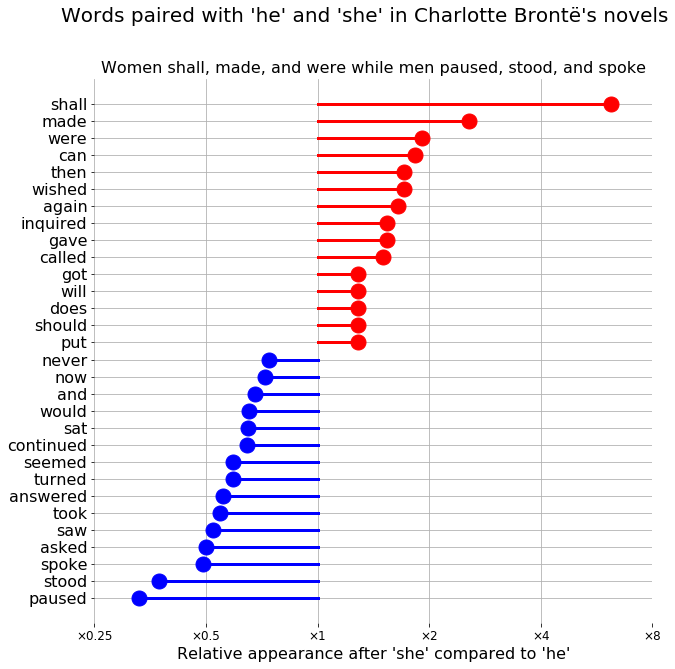

In [43]:
gender_plot(plot_items_bronte, 'Charlotte Brontë')